# Media Company Linear Regression Case Study

### Problem Statement

- A show had been launched by a digital media corporation (similar to Crunchyroll, Hotstar, Netflix, and others). 
- The show had a positive reception at first, but later saw a drop in viewing.
- The firm wishes to ascertain what went wrong.

### Importing all required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

### Importing the dataset

In [2]:
media = pd.read_csv('mediacompany.csv')

 ### Reading the dataset

In [3]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


### Cleaning the dataset

#### We can drop the last column - <code>Unnamed: 7</code>

In [4]:
media = media.drop('Unnamed: 7',axis = 1)

#### Let's explore the top 5 rows

In [5]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


#### Converting date to Pandas datetime format

In [6]:
media['Date'] = pd.to_datetime(media['Date'])
media['Date2'] = datetime(2017, 2, 28) # Taking date since the show started 

#### Dataset after cleaning and formatting

In [7]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Date2
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2017-02-28
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2017-02-28
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,2017-02-28
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,2017-02-28
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,2017-02-28


### Creating dummy variables <code>days</code>

#### Calculating number of days since the show started

In [8]:
from datetime import date

d0 = media.Date2
d1 = media.Date
delta = d1 - d0
media['day']= delta
media = media.drop(columns = ['Date2'], axis=1)

In [9]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


#### Cleaning days

In [10]:
media['day'] = media['day'].astype(str)
media['day'] = media['day'].map(lambda x: x[0:2])
media['day'] = media['day'].astype(int)

In [11]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


### Creating dummy variable <code>weekday</code>

#### Inspecting values in column <code>weekday</code>
- 1 : Sunday
- 2 : Monday
- 3 : Tuesday
- 4 : Wednesday
- 5 : Thursday
- 6 : Friday
- 7 : Saturday


- <i>Weekdays are taken such that 1 corresponds to Sunday and 7 to Saturday</i>
- <i>Generate the weekday variable</i>

In [12]:
media['weekday'] = (media['day']+3)%7
media.weekday.replace(0,7, inplace=True)
media['weekday'] = media['weekday'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


In [13]:
# Use this method if you want days by name
# media['weekday'] = media['Date'].dt.day_name()
# media.head()

In [14]:
media.weekday.value_counts().sort_index(ascending=True)

1    11
2    11
3    11
4    12
5    12
6    12
7    11
Name: weekday, dtype: int64

## EDA and visualizations

### <li><code>days</code> vs <code>Views_show</code>

<AxesSubplot:xlabel='day', ylabel='Views_show'>

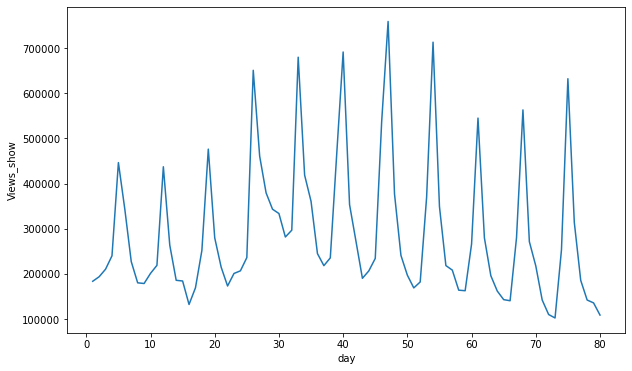

In [15]:
plt.figure(figsize=(10, 6))
# media.plot.line(x='day', y='Views_show')
sns.lineplot(data=media, x=media.day, y=media.Views_show)
# plt.legend(title='days vs Views_show', loc='upper right', labels=['Views'])

### <li><code>days</code> vs <code>Ad_impression</code></li>

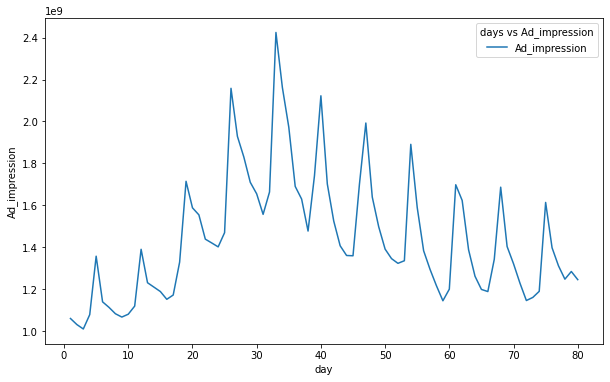

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=media, x=media.day, y=media.Ad_impression)
plt.legend(title='days vs Ad_impression', loc='upper right', labels=['Ad_impression'])

### Scatter Plot ( <code>days</code> vs <code>Views_show</code> )

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


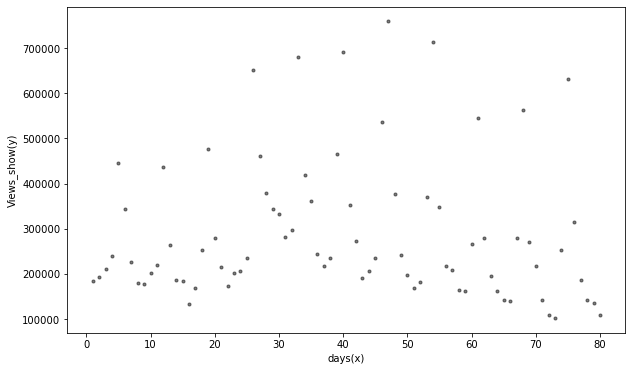

In [17]:
colors = (0,0,0)
area = np.pi*3
plt.figure(figsize=(10, 6))
plt.scatter(media.day, media.Views_show, s=area, c=colors, alpha=0.5)
# plt.title('Scatter plot pythonspot.com')
plt.xlabel("days(x)")
plt.ylabel("Views_show(y)")
plt.show()